# Performing various feature selection methods on the cleaned data

In [16]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import plot_tree

In [17]:
# Reading the cleaned Toxicity data as a pandas DataFrame
chem_df = pd.read_csv("data_cleaned.csv")
display(chem_df.head())

,MATS3v,MATS3s,MATS3p,nHBDon_Lipinski,MATS3e,MATS3c,minHBint2,MATS3m,MATS3i,VR3_Dt,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,ETA_dEpsilon_C,Class
0,0.0908,0.0075,0.0173,0,-0.0436,0.0409,0.0,0.1368,-0.0574,31.8800,...,0.0000,0.0000,0.0000,0.0000,0.1780,1.5488,0.0088,0,-0.0868,NonToxic
1,0.0213,0.1144,-0.0410,0,0.1231,-0.0316,0.0,0.1318,-0.0715,28.2796,...,2.1204,28.2185,8.8660,19.3525,0.1739,1.3718,0.0048,2,-0.0810,NonToxic
2,0.0018,-0.0156,-0.0765,2,-0.1138,-0.1791,0.0,0.0615,-0.2185,66.8884,...,2.0850,33.1064,5.2267,27.8796,0.1688,1.4395,0.0116,2,-0.1004,NonToxic
3,-0.0251,-0.0064,-0.0894,3,-0.0747,-0.1151,0.0,0.0361,-0.2025,34.2573,...,2.0797,32.5232,7.7896,24.7336,0.1702,1.4654,0.0133,2,-0.1010,NonToxic
4,0.0135,0.0424,-0.0353,0,-0.0638,0.0307,0.0,0.0306,-0.0871,25.7867,...,2.1092,32.0726,12.3240,19.7486,0.1789,1.4495,0.0120,2,-0.1071,NonToxic


In [18]:
# Splitting the dataframe into features and class data, assuming 'Class' is the target variable
X = chem_df.drop(columns=['Class'])  
y = chem_df['Class']

### Performing logistic regression using mutual information gain to select features

In [30]:
# Define the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)
# Call the feature_selection_filter()
results_filter_log = feature_selection_filter(X, y, model, cv, score_func=mutual_info_classif)

Number of Features: 2, CV Mean Accuracy: 0.6611 ± 0.0311
Number of Features: 3, CV Mean Accuracy: 0.6490 ± 0.0459
Number of Features: 4, CV Mean Accuracy: 0.6435 ± 0.0468
Number of Features: 5, CV Mean Accuracy: 0.6209 ± 0.0764
Number of Features: 6, CV Mean Accuracy: 0.6379 ± 0.0532
Number of Features: 7, CV Mean Accuracy: 0.6438 ± 0.0432
Number of Features: 8, CV Mean Accuracy: 0.6150 ± 0.0668
Number of Features: 9, CV Mean Accuracy: 0.6320 ± 0.0406
Number of Features: 10, CV Mean Accuracy: 0.5739 ± 0.0819
Number of Features: 11, CV Mean Accuracy: 0.5974 ± 0.0906
Number of Features: 12, CV Mean Accuracy: 0.5510 ± 0.1032
Number of Features: 13, CV Mean Accuracy: 0.5804 ± 0.1012
Number of Features: 14, CV Mean Accuracy: 0.5742 ± 0.0983
Number of Features: 15, CV Mean Accuracy: 0.5925 ± 0.1259
Number of Features: 16, CV Mean Accuracy: 0.5863 ± 0.1188
Number of Features: 17, CV Mean Accuracy: 0.5451 ± 0.0880
Number of Features: 18, CV Mean Accuracy: 0.5925 ± 0.1339
Number of Features: 19

### Performing deciscion tree classification using mutual information gain to select features

In [31]:
# Define the Deciscion Tree Classifier
model = DecisionTreeClassifier(random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)
# Call the feature_selection_filter()
results_filter_dtc = feature_selection_filter(X, y, model, cv, score_func=mutual_info_classif)

Number of Features: 2, CV Mean Accuracy: 0.6595 ± 0.1689
Number of Features: 3, CV Mean Accuracy: 0.6078 ± 0.1496
Number of Features: 4, CV Mean Accuracy: 0.5732 ± 0.1681
Number of Features: 5, CV Mean Accuracy: 0.6010 ± 0.1652
Number of Features: 6, CV Mean Accuracy: 0.5856 ± 0.1176
Number of Features: 7, CV Mean Accuracy: 0.6212 ± 0.1359
Number of Features: 8, CV Mean Accuracy: 0.6438 ± 0.1225
Number of Features: 9, CV Mean Accuracy: 0.5739 ± 0.1106
Number of Features: 10, CV Mean Accuracy: 0.6150 ± 0.1499
Number of Features: 11, CV Mean Accuracy: 0.6144 ± 0.1549
Number of Features: 12, CV Mean Accuracy: 0.6206 ± 0.1419
Number of Features: 13, CV Mean Accuracy: 0.5618 ± 0.1305
Number of Features: 14, CV Mean Accuracy: 0.6261 ± 0.1164
Number of Features: 15, CV Mean Accuracy: 0.6500 ± 0.1432
Number of Features: 16, CV Mean Accuracy: 0.6493 ± 0.1678
Number of Features: 17, CV Mean Accuracy: 0.6088 ± 0.1465
Number of Features: 18, CV Mean Accuracy: 0.5794 ± 0.1465
Number of Features: 19

### Performing random forest classification using mutual information gain to select features

In [32]:
# Define the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)
# Call the feature_selection_filter()
results_filter_rfc = feature_selection_filter(X, y, model, cv, score_func=mutual_info_classif)

Number of Features: 2, CV Mean Accuracy: 0.6778 ± 0.1407
Number of Features: 3, CV Mean Accuracy: 0.6954 ± 0.1022
Number of Features: 4, CV Mean Accuracy: 0.6667 ± 0.1116
Number of Features: 5, CV Mean Accuracy: 0.6837 ± 0.0854
Number of Features: 6, CV Mean Accuracy: 0.6725 ± 0.0794
Number of Features: 7, CV Mean Accuracy: 0.7069 ± 0.1096
Number of Features: 8, CV Mean Accuracy: 0.6895 ± 0.1127
Number of Features: 9, CV Mean Accuracy: 0.7075 ± 0.1290
Number of Features: 10, CV Mean Accuracy: 0.7016 ± 0.0618
Number of Features: 11, CV Mean Accuracy: 0.6608 ± 0.1310
Number of Features: 12, CV Mean Accuracy: 0.7013 ± 0.1043
Number of Features: 13, CV Mean Accuracy: 0.6840 ± 0.0886
Number of Features: 14, CV Mean Accuracy: 0.6722 ± 0.0926
Number of Features: 15, CV Mean Accuracy: 0.6899 ± 0.0955
Number of Features: 16, CV Mean Accuracy: 0.6556 ± 0.0857
Number of Features: 17, CV Mean Accuracy: 0.7020 ± 0.0655
Number of Features: 18, CV Mean Accuracy: 0.6899 ± 0.0704
Number of Features: 19

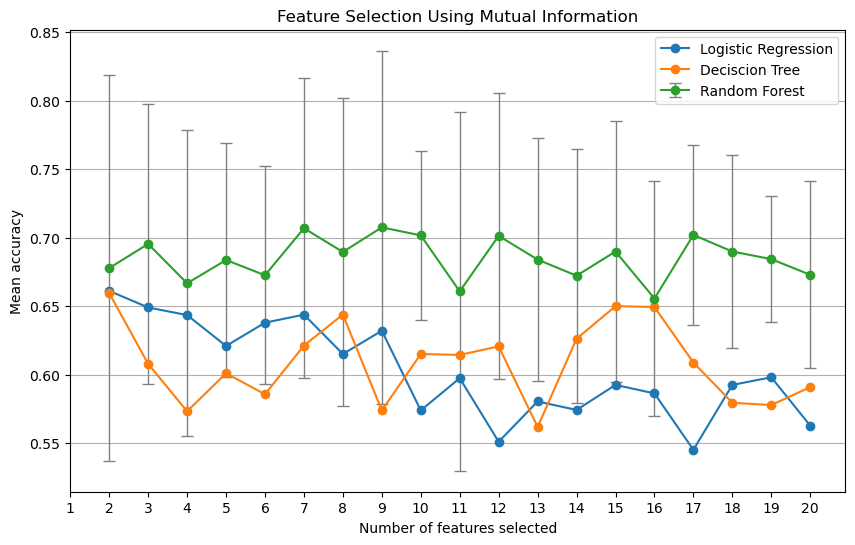

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

# Plot Logistic Regression results
plt.errorbar(
    x=results_filter_log["n_features"],
    y=results_filter_log["cv_mean_accuracy"],
    
    fmt='-o',  # Line with markers
    
    elinewidth=1,  # Width of the error bars
    capsize=4,  # Add caps at the ends of the error bars
    label='Logistic Regression'  # Label for legend
)

# Plot Deciscion Tree n results
plt.errorbar(
    x=results_filter_dtc["n_features"],
    y=results_filter_dtc["cv_mean_accuracy"],
    
    fmt='-o',  # Line with markers
    
    elinewidth=1,
    capsize=4,
    label='Deciscion Tree'
)

# Plot Random Forest results
plt.errorbar(
    x=results_filter_rfc["n_features"],
    y=results_filter_rfc["cv_mean_accuracy"],
    yerr=results_filter_rfc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='grey',
    elinewidth=1,
    capsize=4,
    label='Random Forest'
)

# Set x-ticks to range from 1 to 20
plt.xticks(ticks=range(1, 21))
plt.grid(axis='y')
plt.title("Feature Selection Using Mutual Information")
plt.legend()
plt.show()

### Performing Recursive Feature Elimination using a Descision Tree Classifier

In [20]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_dtc, best_model_dtc = recursive_feature_elimination(X, y, dtc, skf, param_grid)

Analyzing RFE with 2 features
Number of Features: 2, CV Mean Accuracy: 0.6725 ± 0.0278
Analyzing RFE with 3 features
Number of Features: 3, CV Mean Accuracy: 0.7127 ± 0.0823
Analyzing RFE with 4 features
Number of Features: 4, CV Mean Accuracy: 0.7307 ± 0.0760
Analyzing RFE with 5 features
Number of Features: 5, CV Mean Accuracy: 0.7307 ± 0.0760
Analyzing RFE with 6 features
Number of Features: 6, CV Mean Accuracy: 0.7598 ± 0.1279
Analyzing RFE with 7 features
Number of Features: 7, CV Mean Accuracy: 0.7660 ± 0.1085
Analyzing RFE with 8 features
Number of Features: 8, CV Mean Accuracy: 0.7598 ± 0.0935
Analyzing RFE with 9 features
Number of Features: 9, CV Mean Accuracy: 0.7719 ± 0.1034
Analyzing RFE with 10 features
Number of Features: 10, CV Mean Accuracy: 0.7542 ± 0.1230
Analyzing RFE with 11 features
Number of Features: 11, CV Mean Accuracy: 0.8072 ± 0.1114
Analyzing RFE with 12 features
Number of Features: 12, CV Mean Accuracy: 0.8131 ± 0.1136
Analyzing RFE with 13 features
Number

DecisionTreeClassifier(max_depth=7, max_features=11, min_samples_split=4,
                       random_state=42)

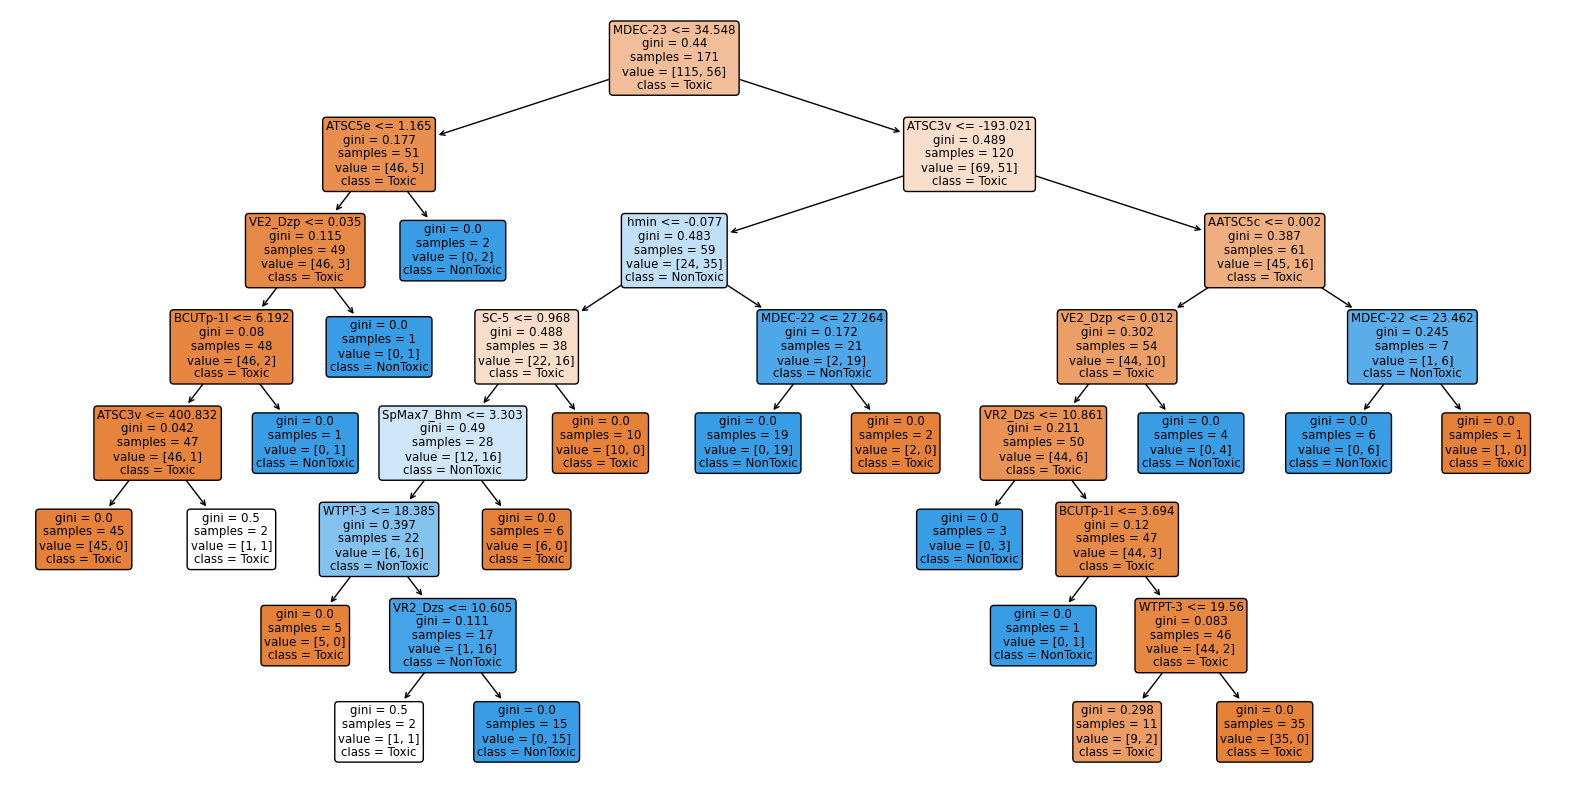

In [49]:
plt.figure(figsize=(20,10))
plot_tree(best_model_dtc, filled=True, feature_names=['MDEC-23', 'MDEC-22', 'VR2_Dzs', 'ATSC3v', 'SpMax7_Bhm', 'BCUTp-1l', 'SC-5', 'AATSC5c', 'ATSC5e', 'hmin', 'VE2_Dzp', 'WTPT-3'], class_names=['Toxic', 'NonToxic'], rounded=True)
display(best_model_dtc)
plt.show()

### Performing Recursive Feature Elimination using a Random Forest Classifier

In [22]:
# Initialize the Randon Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_rfc, best_model_rfc = recursive_feature_elimination(X, y, rfc, skf, param_grid)

Analyzing RFE with 2 features
Number of Features: 2, CV Mean Accuracy: 0.7366 ± 0.0665
Analyzing RFE with 3 features
Number of Features: 3, CV Mean Accuracy: 0.7193 ± 0.0779
Analyzing RFE with 4 features
Number of Features: 4, CV Mean Accuracy: 0.7010 ± 0.0865
Analyzing RFE with 5 features
Number of Features: 5, CV Mean Accuracy: 0.7069 ± 0.1064
Analyzing RFE with 6 features
Number of Features: 6, CV Mean Accuracy: 0.7010 ± 0.0942
Analyzing RFE with 7 features
Number of Features: 7, CV Mean Accuracy: 0.7363 ± 0.0768
Analyzing RFE with 8 features
Number of Features: 8, CV Mean Accuracy: 0.7248 ± 0.0707
Analyzing RFE with 9 features
Number of Features: 9, CV Mean Accuracy: 0.6951 ± 0.0880
Analyzing RFE with 10 features
Number of Features: 10, CV Mean Accuracy: 0.7131 ± 0.0859
Analyzing RFE with 11 features
Number of Features: 11, CV Mean Accuracy: 0.7190 ± 0.0911
Analyzing RFE with 12 features
Number of Features: 12, CV Mean Accuracy: 0.7190 ± 0.0789
Analyzing RFE with 13 features
Number

### Performing Recursive Feature Elimination using a Logistic Regression Classifier

In [23]:
# Standardize the features before applying Logistic Regression
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))  # Standardizing the dataset
# Logistic Regression with L2 regularization
log = LogisticRegression(solver='liblinear', random_state=42)  # 'liblinear' is good for small datasets
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}
results_log, best_model_log= recursive_feature_elimination(X_scaled, y, log, skf, param_grid)

Analyzing RFE with 2 features
Number of Features: 2, CV Mean Accuracy: 0.6725 ± 0.0278
Analyzing RFE with 3 features
Number of Features: 3, CV Mean Accuracy: 0.6781 ± 0.0314
Analyzing RFE with 4 features
Number of Features: 4, CV Mean Accuracy: 0.6781 ± 0.0667
Analyzing RFE with 5 features
Number of Features: 5, CV Mean Accuracy: 0.6784 ± 0.0651
Analyzing RFE with 6 features
Number of Features: 6, CV Mean Accuracy: 0.6725 ± 0.0651
Analyzing RFE with 7 features
Number of Features: 7, CV Mean Accuracy: 0.6964 ± 0.0537
Analyzing RFE with 8 features
Number of Features: 8, CV Mean Accuracy: 0.6967 ± 0.1007
Analyzing RFE with 9 features
Number of Features: 9, CV Mean Accuracy: 0.7026 ± 0.0882
Analyzing RFE with 10 features
Number of Features: 10, CV Mean Accuracy: 0.7144 ± 0.0917
Analyzing RFE with 11 features
Number of Features: 11, CV Mean Accuracy: 0.7376 ± 0.0804
Analyzing RFE with 12 features
Number of Features: 12, CV Mean Accuracy: 0.7206 ± 0.0904
Analyzing RFE with 13 features
Number

### Plotting the results of the different feature selecion methods 

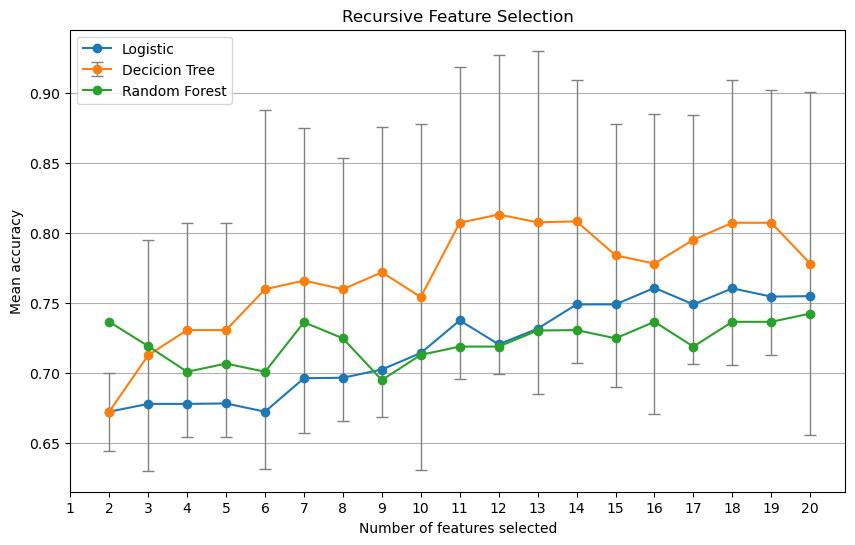

In [46]:
# Plotting
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

# Plot Logistic Regression results
plt.errorbar(
    x=results_log["n_features"],
    y=results_log["cv_mean_accuracy"],
    fmt='-o',  # Line with markers
    elinewidth=1,
    capsize=4,
    label='Logistic'
)

# Plot Descision Tree results
plt.errorbar(
    x=results_dtc["n_features"],
    y=results_dtc["cv_mean_accuracy"],
    yerr=results_dtc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='grey',
    elinewidth=1,
    capsize=4,
    label='Decicion Tree'
)

# Plot Random Forest results
plt.errorbar(
    x=results_rfc["n_features"],
    y=results_rfc["cv_mean_accuracy"],
    fmt='-o',  # Line with markers
    elinewidth=1,
    capsize=4,
    label='Random Forest'
)

# Set x-ticks to range from 1 to 20
plt.xticks(ticks=range(1, 21))
plt.grid(axis='y')
plt.title("Recursive Feature Selection")
plt.legend()
plt.show()

In [25]:
# Create a new dataframe with all the selected features from the optimal dtc
X_selected = X[['MDEC-23', 'MDEC-22', 'VR2_Dzs', 'ATSC3v', 'SpMax7_Bhm', 'BCUTp-1l', 'SC-5', 'AATSC5c', 'ATSC5e', 'hmin', 'VE2_Dzp', 'WTPT-3']]
# Use 10-fold cross-validation as an example (this can be adjusted based on your data)
cv = StratifiedKFold(n_splits=10, shuffle=True)
n_repetitions = 10000
scores = []

# Loop to perform cross-validation 10,000 times
for i in range(n_repetitions):
    # Perform cross-validation and store the scores of each run
    cv_scores = cross_val_score(best_model_dtc, X_selected, y, cv=cv, scoring='accuracy', n_jobs=-1)
    scores.append(np.mean(cv_scores))

# Convert scores to a numpy array for easier calculations
scores = np.array(scores)

# Calculate the overall mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f"Mean accuracy over {n_repetitions} repetitions: {mean_accuracy:.4f}")

Mean accuracy over 10000 repetitions: 0.7902


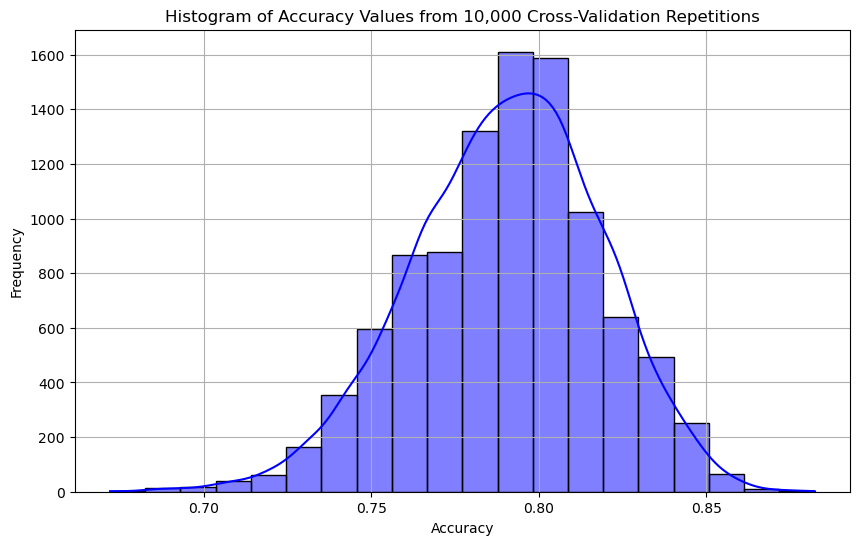

In [26]:
# Create a histogram using seaborn
plt.figure(figsize=(10,6))  # Set the figure size
sns.histplot(scores, bins=20, kde=True, color='blue')  # kde=True adds a Kernel Density Estimate curve
plt.title('Histogram of Accuracy Values from 10,000 Cross-Validation Repetitions')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid()
plt.show()